In [1]:
import pandas as pd
# import numpy as np
import seaborn as sns

## 1. Handling missing values

In [2]:
data = pd.read_csv(r"Social_Network_Ads_1.csv")

In [3]:
data[data.isnull().any(axis=1)] # Missing values

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
10,15570769,1/18/2012,Italy,Female,26,NaN,0
167,15762228,8/30/2012,France,Female,22,NaN,0


In [4]:
data["EstimatedSalary"].median()

70000.0

In [5]:
data.fillna(data["EstimatedSalary"].median(),inplace=True)

In [6]:
data[data.isnull().any(axis=1)]  

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased


## 2.Handling Outliers

### Checking for outliers using boxplot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

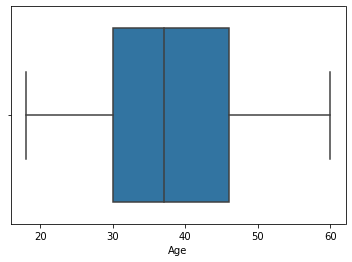

In [7]:
sns.boxplot(data["Age"])

         No Outliers Found in Age Data

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

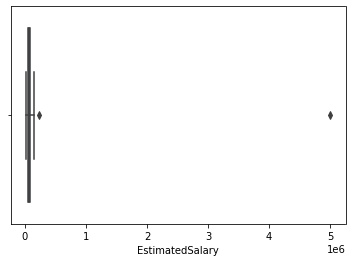

In [8]:
sns.boxplot(data["EstimatedSalary"])

       Outliers Found in Estimated Salary

In [9]:
data["EstimatedSalary"].describe()

count    4.030000e+02
mean     8.230521e+04
std      2.480537e+05
min      1.500000e+04
25%      4.300000e+04
50%      7.000000e+04
75%      8.800000e+04
max      5.000000e+06
Name: EstimatedSalary, dtype: float64

In [10]:
Q1 = data["EstimatedSalary"].describe()["25%"]
Q3 = data["EstimatedSalary"].describe()["75%"]
IQR = Q3-Q1
IQR

45000.0

In [11]:
lower_boundary = Q1 - (1.5*IQR)
lower_boundary 

-24500.0

In [12]:
upper_boundary = Q3 + (1.5*IQR)
upper_boundary

155500.0

In [13]:
data[data["EstimatedSalary"] < -24500.0] # Checking for lower outliers

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased


In [14]:
data[data["EstimatedSalary"] > 155500.0] #Checking for upper outlier

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
161,15734234,8/22/2012,France,Male,36,5000000.0,1
281,15613334,2/15/2013,Italy,Female,54,233000.0,1


In [15]:
outlier_index = data[data["EstimatedSalary"] > 155500].index   # Now we get the index of the outliers 

In [16]:
data.drop(outlier_index,inplace=True) # Removed Outliers

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

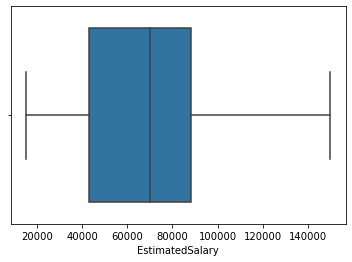

In [17]:
sns.boxplot(data["EstimatedSalary"])

              No Outliers Found

## 3. Handling Categorical Text Data

In [18]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
data["Country"].unique()

array(['France', 'Italy', 'Germany', ']Italy&', ']Germany&', 'Germany&'],
      dtype=object)

####  Replacing / Removing Garbage Values

In [20]:
import re
re.sub("[^A-Za-z0-9]+","","]Italy&") 

'Italy'

In [21]:
data["Country"] = data["Country"].apply(lambda x: re.sub("[^A-Za-z0-9]+","",x))

In [22]:
data["Country"].unique()

array(['France', 'Italy', 'Germany'], dtype=object)

#### One Hot Encoding

In [23]:
data = pd.get_dummies(data,columns = ["Country","Gender"])

In [24]:
data

,User ID,Date,Age,EstimatedSalary,Purchased,Country_France,Country_Germany,Country_Italy,Gender_Female,Gender_Male
0,15624510,01-03-2012,19,19000.0,0,1,0,0,0,1
1,15810944,01-04-2012,35,20000.0,0,0,0,1,0,1
2,15668575,01-05-2012,26,43000.0,0,1,0,0,1,0
3,15603246,01-06-2012,27,57000.0,0,0,1,0,1,0
4,15804002,01-09-2012,19,76000.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
398,15691863,08-05-2013,46,41000.0,1,1,0,0,1,0
399,15706071,08-06-2013,51,23000.0,1,0,0,1,0,1
400,15654296,08-07-2013,50,20000.0,1,0,0,1,1,0
401,15755018,08-08-2013,36,33000.0,0,0,1,0,0,1


## 4. Handling Dates

In [25]:
pd.to_datetime(data["Date"]) # Column will be converted to date and time format

0     2012-01-03
1     2012-01-04
2     2012-01-05
3     2012-01-06
4     2012-01-09
         ...    
398   2013-08-05
399   2013-08-06
400   2013-08-07
401   2013-08-08
402   2013-08-09
Name: Date, Length: 401, dtype: datetime64[ns]

In [26]:
data["Date"] = pd.to_datetime(data["Date"])

In [27]:
data["Year"] = data["Date"].dt.year # adding the year column

In [28]:
data["Month"] = data["Date"].dt.month

In [29]:
data["Day"] = data["Date"].dt.day

In [30]:
data

,User ID,Date,Age,EstimatedSalary,Purchased,Country_France,Country_Germany,Country_Italy,Gender_Female,Gender_Male,Year,Month,Day
0,15624510,2012-01-03,19,19000.0,0,1,0,0,0,1,2012,1,3
1,15810944,2012-01-04,35,20000.0,0,0,0,1,0,1,2012,1,4
2,15668575,2012-01-05,26,43000.0,0,1,0,0,1,0,2012,1,5
3,15603246,2012-01-06,27,57000.0,0,0,1,0,1,0,2012,1,6
4,15804002,2012-01-09,19,76000.0,0,1,0,0,0,1,2012,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,15691863,2013-08-05,46,41000.0,1,1,0,0,1,0,2013,8,5
399,15706071,2013-08-06,51,23000.0,1,0,0,1,0,1,2013,8,6
400,15654296,2013-08-07,50,20000.0,1,0,0,1,1,0,2013,8,7
401,15755018,2013-08-08,36,33000.0,0,0,1,0,0,1,2013,8,8


Now we can remove Date Column

In [31]:
data.drop("Date",axis=1,inplace=True)

In [32]:
data.dtypes

User ID              int64
Age                  int64
EstimatedSalary    float64
Purchased            int64
Country_France       uint8
Country_Germany      uint8
Country_Italy        uint8
Gender_Female        uint8
Gender_Male          uint8
Year                 int64
Month                int64
Day                  int64
dtype: object

# Splitting data into Independent and Dependent variable

### Once Missing values and outliers are handled , Our data is converted to Numerical Format(Categorical Data and Dates) , Then we can split the data into two parts Independent Variable and dependent variable


    Independent Variable
           Independent variables are Inputs(Features) That is affecting the target is called Independent variables(Variables used to predict the target)
           
    Dependent Variable
            This is the variable that we want to predict  

In above data we have to predict the customer purchases the the product or not so,

       Independent Variable ->  Age, EstimatedSalary, Country_France, Country_Germany, Country_Italy,
                                  Gender_Female,    Gender_Male, Year, Month, Day
       
       Dependent Variable ->  Purchased

    Independent Variable -> X
    Dependent Variable   -> y

In [33]:
x = data.drop("Purchased",axis=1)  # Now x have all the independet variable

In [34]:
y = data["Purchased"]

# Splitting Data Into Train and Test

We need Different data for testing and training the model
        
        For Training we are giving both inputs and outputs
        
             Inputs -> x_train
             Output -> y_train
        
        For Testing There should be separate data
        
             Inputs                   -> x_test
             predicted_output         -> y-pred
             Actual Output            -> y_test
             

###### Based on y_pred and y_test we evaulate the model

When we don't have a separate data for testing purpose. We split our existing data into two parts for training and testing

###### When we split data it should be in a random manner

If the data is time series(Current data(row) depends on the previous data) then we should not do in a random order

### In which ratio we should split the data

     General Ratios For Splitting the Data
     
     1. 80:20 -> 80 Percentage For Training and 20% For Testing
     
     2. 75:25
     
     3. 90:10 (When you have large amount of data)
     
     4. 70:30 (When you have small amount of data)

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8) # Ratio 80:20

In [42]:
x_train.shape

(320, 11)

In [43]:
x_test.shape

(81, 11)

In [45]:
x_train

,User ID,Age,EstimatedSalary,Country_France,Country_Germany,Country_Italy,Gender_Female,Gender_Male,Year,Month,Day
311,15596761,36,125000.0,1,0,0,0,1,2013,4,2
299,15673539,42,73000.0,0,1,0,0,1,2013,3,14
211,15697424,46,22000.0,1,0,0,1,0,2012,11,5
15,15697686,29,80000.0,0,1,0,0,1,2012,1,25
210,15800890,40,142000.0,0,0,1,1,0,2012,11,2
...,...,...,...,...,...,...,...,...,...,...,...
221,15732987,59,143000.0,0,1,0,0,1,2012,11,19
231,15721007,42,80000.0,0,1,0,1,0,2012,12,4
47,15776348,27,54000.0,0,1,0,1,0,2012,3,12
60,15814004,27,20000.0,1,0,0,0,1,2012,3,29
